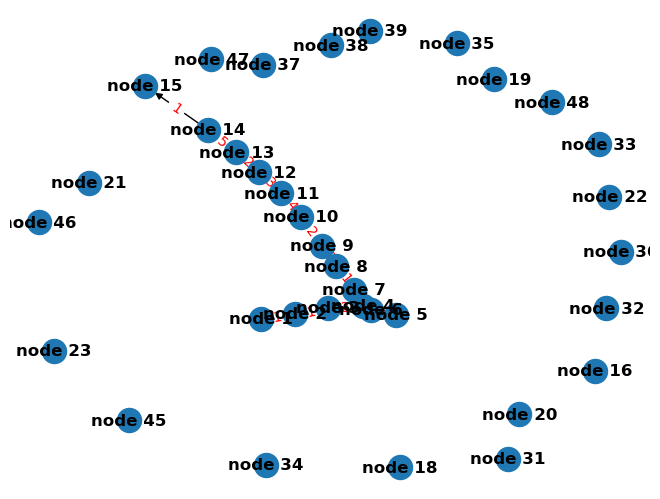

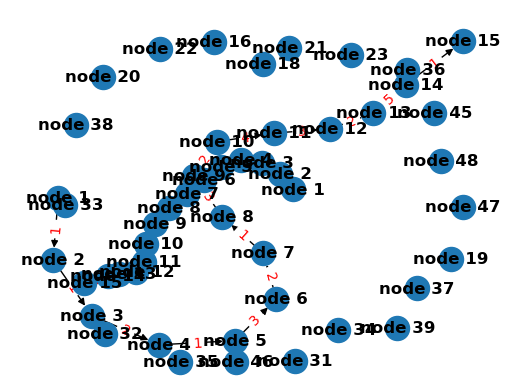

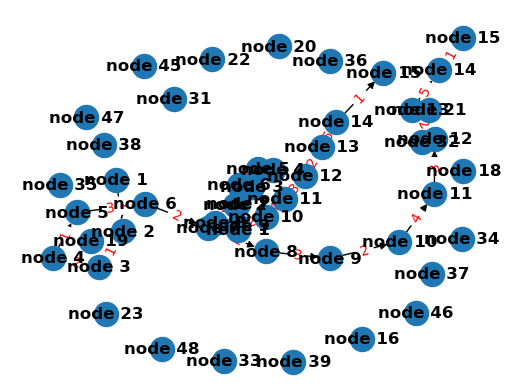

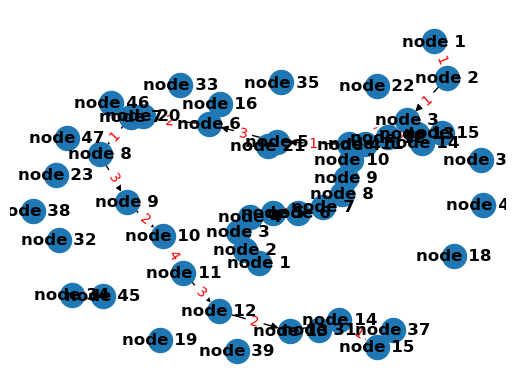

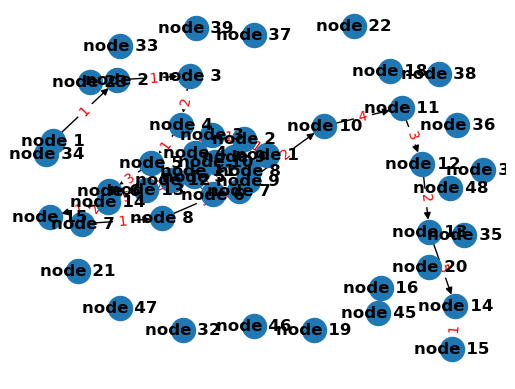

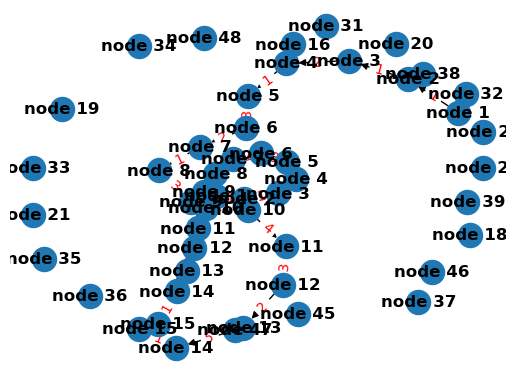

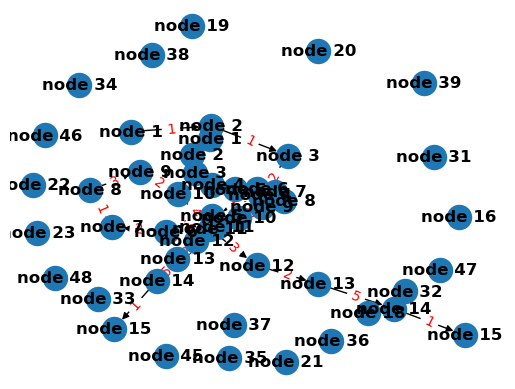

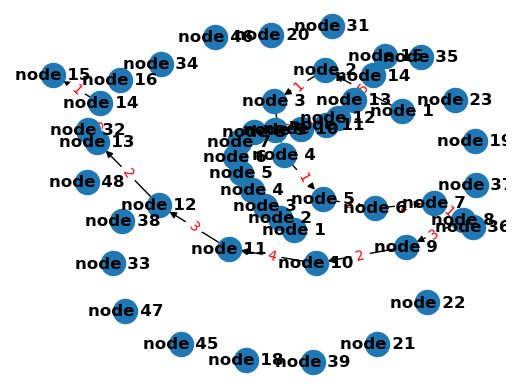

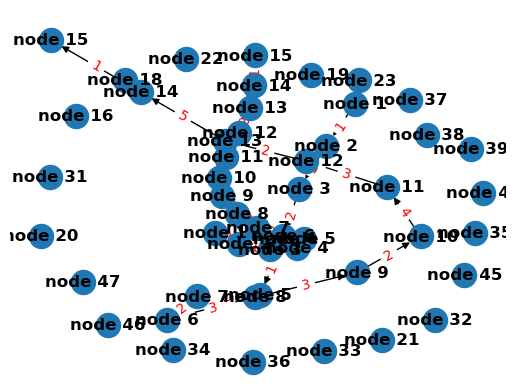

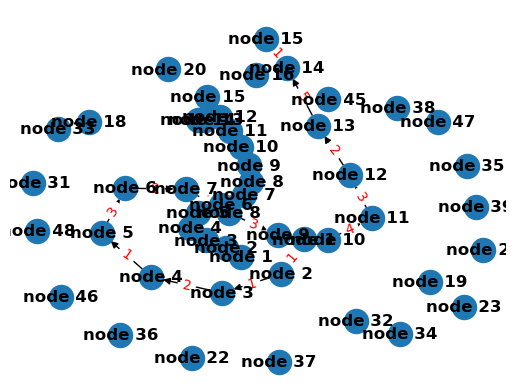

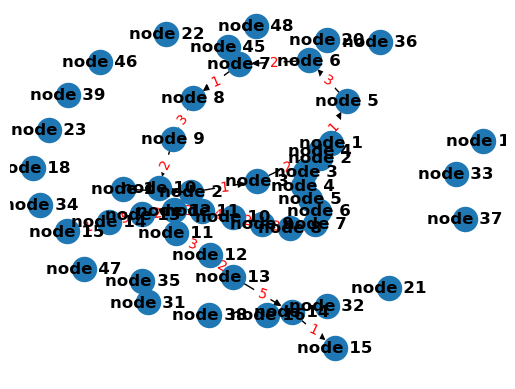

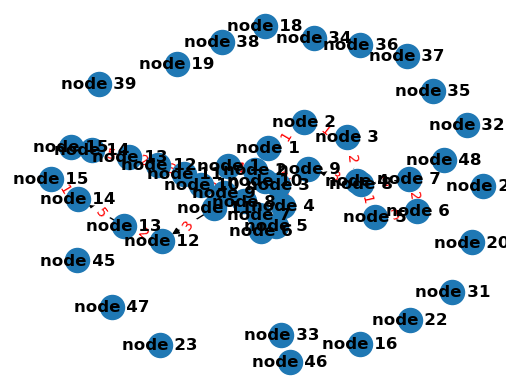

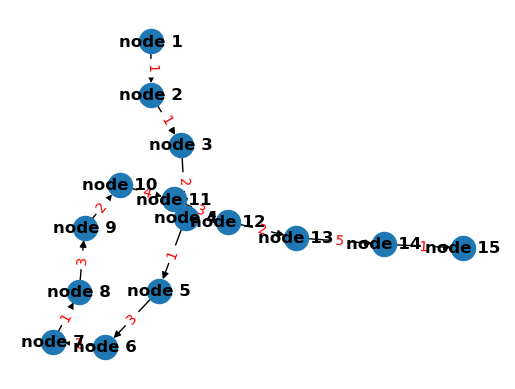

In [1]:
import tkinter as tk
import networkx as nx          
import matplotlib.pyplot as plt  
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

graph = {
    'node 1': [('node 2', 1), ('node 20', 19)],
    'node 2': [('node 1', 7), ('node 3', 1)],
    'node 3': [('node 2', 8), ('node 4', 2), ('node 16', 12), ('node 33', 5)],
    'node 4': [('node 3', 6), ('node 5', 1)],
    'node 5': [('node 4', 8), ('node 6', 3), ('node 23', 16)],
    'node 6': [('node 5', 8), ('node 7', 2), ('node 39', 10), ('node 34', 10)],
    'node 7': [('node 6', 6), ('node 8', 1)],
    'node 8': [('node 7', 8), ('node 9', 3), ('node 18', 3)],
    'node 9': [('node 10', 2), ('node 32', 10), ('node 8', 4)],
    'node 10': [('node 9', 8), ('node 11', 4), ('node 38', 14)],
    'node 11': [('node 10', 8), ('node 12', 3), ('node 37', 16)],
    'node 12': [('node 11', 7), ('node 13', 2), ('node 36', 19)],
    'node 13': [('node 12', 7), ('node 14', 5)],
    'node 14': [('node 13', 9), ('node 15', 1), ('node 38', 25)],
    'node 15': [('node 14', 10), ('node 37', 9)],
    'node 16': [('node 7', 3), ('node 3', 9)],
    'node 18': [('node 19', 4), ('node 8', 2), ('node 21', 4)],
    'node 19': [('node 20', 4), ('node 18', 1)],
    'node 20': [('node 1', 38), ('node 19', 4), ('node 35', 9),('node 37', 9)],
    'node 21': [('node 18', 1), ('node 22', 4), ('node 31', 18)],
    'node 22': [('node 21', 7), ('node 23', 3), ('node 35', 18)],
    'node 23': [('node 5', 14), ('node 22', 7)],
    'node 31': [('node 21', 6)],
    'node 32' : [('node 9', 10)],
    'node 33': [('node 3', 12), ('node 45', 4), ('node 38', 3)],
    'node 34': [('node 46', 3), ('node 47', 8), ('node 6', 15)],
    'node 35': [('node 22', 9), ('node 20', 9)],
    'node 36': [('node 37', 13), ('node 12', 19)],
    'node 37': [('node 15', 9), ('node 20', 9), ('node 36', 13)],
    'node 38': [('node 33', 7), ('node 47', 8)],
    'node 48': [('node 46', 9), ('node 14', 30), ('node 10', 10)],
    'node 45': [('node 33', 6), ('node 46', 5)],
    'node 46': [('node 45', 9), ('node 48', 10), ('node 34', 3)],
    'node 47': [('node 38', 7), ('node 34', 3), ('node 11', 4)],
    'node 39': [('node 6', 8)],
    
}

heuristicT = {
    'node 1': 6,
    'node 2': 1,
    'node 3': 1,
    'node 4': 3,
    'node 5': 2,
    'node 6': 4,
    'node 7': 5,
    'node 8': 7,
    'node 9': 6,
    'node 10': 3,
    'node 11': 4,
    'node 12': 5,
    'node 13': 5,
    'node 14': 6,
    'node 15': 0,
    'node 16': 3,
    'node 18': 20,
    'node 19': 28,
    'node 20': 30,
    'node 21': 18,
    'node 22': 15,
    'node 23': 12,
    'node 31': 11,
    'node 32': 10,
    'node 33': 5,
    'node 34': 4,
    'node 35': 13,
    'node 36': 28,
    'node 37': 30,
    'node 38': 3,
    'node 48': 10,
     'node 45': 4,
    'node 46': 2,
    'node 47': 2,
    'node 39': 10,
}
def Fcost(path):
    Gcost = 0
    for (node, cost) in path:
        Gcost += cost
    lastNode = path[-1][0]
    Hcost = heuristicT[lastNode]
    Fcost = Gcost + Hcost
    return Fcost, lastNode

def aStarAlgorithm(graph, start, goal):
    visited = []
    Qu = [[(start, 0)]]
    G = nx.DiGraph()
    G.add_nodes_from(graph.keys())
    while Qu:
        Qu.sort(key=Fcost)
        path = Qu.pop(0)
        node = path[-1][0]
        if node in visited:
            continue
        visited.append(node)
        if node == goal:
            G.add_edges_from([(path[i][0], path[i+1][0]) for i in range(len(path)-1)])
            pos = nx.spring_layout(G)
            nx.draw(G, pos, with_labels=True, font_weight='bold')
            nx.draw_networkx_edge_labels(G, pos, edge_labels={(path[i][0], path[i+1][0]): path[i+1][1] for i in range(len(path)-1)}, font_color='red')
            plt.show()
            return path
        else:
            nextNode = graph.get(node, [])
            for (node2, cost) in nextNode:
                newPath = path.copy()
                newPath.append((node2, cost))
                Qu.append(newPath)

class AStarGUI(tk.Frame):
    def __init__(self, master=None):
        super().__init__(master)
        self.master = master
        self.graph = graph
        self.start_node = tk.StringVar(value='node 1')
        self.end_node = tk.StringVar(value='node 15')
        self.result_text = tk.StringVar()
        self.create_widgets()

    def create_widgets(self):
        tk.Label(self.master, text='Starting node:').grid(row=0, column=0)
        tk.Entry(self.master, textvariable=self.start_node).grid(row=0, column=1)
        tk.Label(self.master, text='Ending node:').grid(row=1, column=0)
        tk.Entry(self.master, textvariable=self.end_node).grid(row=1, column=1)
        tk.Button(self.master, text='Find path', command=self.run_algorithm).grid(row=2, columnspan=2)
        tk.Label(self.master, textvariable=self.result_text).grid(row=14, columnspan=2)
    
    def run_algorithm(self):
        start = self.start_node.get()
        goal = self.end_node.get()
        result = aStarAlgorithm(self.graph, start, goal)
        if result:
            path_cost = Fcost(result)[0]
            self.result_text.set(f'Path found: {result}\nCost: {path_cost}')
            # Plot the graph
            G = nx.DiGraph()
            G.add_edges_from([(result[i][0], result[i+1][0]) for i in range(len(result)-1)])
            pos = nx.spring_layout(G)
            fig, ax = plt.subplots()
            nx.draw(G, pos, with_labels=True, font_weight='bold', ax=ax)
            nx.draw_networkx_edge_labels(G, pos, edge_labels={(result[i][0], result[i+1][0]): result[i+1][1] for i in range(len(result)-1)}, font_color='red', ax=ax)
            canvas = FigureCanvasTkAgg(fig, master=self.master)
            canvas.get_tk_widget().grid(row=3, columnspan=2)
        else:
            self.result_text.set('No path found.')
            
root = tk.Tk()
app = AStarGUI(master=root)
app.mainloop()